<a href="https://colab.research.google.com/github/SIDIBEMoussa/Social-network-analysis/blob/main/Social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
path="/content/drive/MyDrive/Marveldataset"

In [4]:
import networkx as nx
import turicreate as tc 

nodes = tc.SFrame.read_csv(path+"/nodes.csv")
hero_network = tc.SFrame.read_csv(path+"/hero-network.csv")

Finished parsing file /content/drive/MyDrive/Marveldataset/nodes.csv

Parsing completed. Parsed 100 lines in 0.055541 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/MyDrive/Marveldataset/nodes.csv

Parsing completed. Parsed 19090 lines in 0.027569 secs.

Finished parsing file /content/drive/MyDrive/Marveldataset/hero-network.csv

Parsing completed. Parsed 100 lines in 0.062697 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/MyDrive/Marveldataset/hero-network.csv

Parsing completed. Parsed 27063 lines in 0.04053 secs.

In [5]:
nodes

Columns:
	node	str
	type	str

Rows: 19090

Data:
+----------------------+-------+
|         node         |  type |
+----------------------+-------+
|       2001 10        | comic |
|        2001 8        | comic |
|        2001 9        | comic |
| 24-HOUR MAN/EMMANUEL |  hero |
| 3-D MAN/CHARLES CHAN |  hero |
|   4-D MAN/MERCURIO   |  hero |
|       8-BALL/        |  hero |
|        A '00         | comic |
|        A '01         | comic |
|        A 100         | comic |
+----------------------+-------+
[19090 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [6]:
hero_network

Columns:
	hero1	str
	hero2	str

Rows: 27063

Data:
+----------------------+----------------------+
|        hero1         |        hero2         |
+----------------------+----------------------+
|    LITTLE, ABNER     |    PRINCESS ZANDA    |
|    LITTLE, ABNER     | BLACK PANTHER/T'CHAL |
| BLACK PANTHER/T'CHAL |    PRINCESS ZANDA    |
|    LITTLE, ABNER     |    PRINCESS ZANDA    |
|    LITTLE, ABNER     | BLACK PANTHER/T'CHAL |
| BLACK PANTHER/T'CHAL |    PRINCESS ZANDA    |
| STEELE, SIMON/WOLFGA |   FORTUNE, DOMINIC   |
| STEELE, SIMON/WOLFGA | ERWIN, CLYTEMNESTRA  |
| STEELE, SIMON/WOLFGA | IRON MAN/TONY STARK  |
| STEELE, SIMON/WOLFGA | IRON MAN IV/JAMES R. |
+----------------------+----------------------+
[27063 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [8]:
%%timeit
g = nx.Graph() # Creating Undirected Graph

# adding each node and edge one after the other
for n in nodes['node']:
    g.add_node(n)
    
for r in hero_network:
    g.add_edge(r['hero1'], r['hero2'])

165 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
g = nx.Graph() # Creating Undirected Graph
# adding all nodes and vertices at once
g.add_nodes_from(nodes['node'])
g.add_edges_from([(r['hero1'],r['hero2']) for r in hero_network])

164 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
g = nx.Graph() # Creating Undirected Graph
g.add_nodes_from(n_sf['node'])
g.add_edges_from([(r['hero1'],r['hero2']) for r in e_sf])
print(nx.info(g))

Graph with 19143 nodes and 13738 edges


Q1

In [12]:
d = g.degree()
list(dict(d).items())[:20]

[('2001 10', 0),
 ('2001 8', 0),
 ('2001 9', 0),
 ('24-HOUR MAN/EMMANUEL', 0),
 ('3-D MAN/CHARLES CHAN', 0),
 ('4-D MAN/MERCURIO', 41),
 ('8-BALL/', 0),
 ("A '00", 0),
 ("A '01", 0),
 ('A 100', 0),
 ('A 101', 0),
 ('A 102', 0),
 ('A 103', 0),
 ('A 104', 0),
 ('A 105', 0),
 ('A 106', 0),
 ('A 107', 0),
 ('A 108', 0),
 ('A 109', 0),
 ('A 10', 0)]

In [13]:
print("There are %s superheroes connected to Black Panter"  %
      d["BLACK PANTHER/T'CHAL"])

There are 124 superheroes connected to Black Panter


In [14]:
import operator
max(dict(d).items(), key=operator.itemgetter(1))

('CAPTAIN AMERICA', 352)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


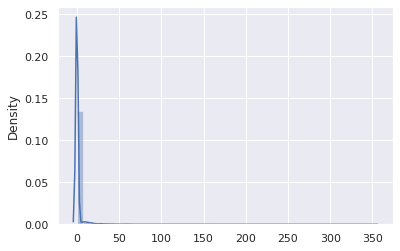

In [15]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.distplot([v for v in dict(d).values()])

In [16]:
# let's create a list with nodes that have degree > 1
selected_nodes_list = [n for n,d in dict(d).items() if d > 1]
# create a subgraph with only nodes from the above list
h = g.subgraph(selected_nodes_list)
print(nx.info(h))

Graph with 1109 nodes and 13725 edges


In [17]:
from networkx.algorithms.community import greedy_modularity_communities
cc = greedy_modularity_communities(h) # this can take some time
len(cc)

20

In [18]:
list(cc[0])[:20]

['SHARPE, ROSALINDE',
 'SUNDOWN/DR. DAVE LOW',
 'BULLSEYE II/BENJAMIN',
 'GHAUR [DEVIANT]',
 'SPEEDBALL II/DARRION',
 'WIPEOUT',
 'SUMMERS, MADELYNE MA',
 'LUMLEY, JUDY',
 'GHOST RIDER II/JOHNN',
 'HOBGOBLIN III/LEFTY ',
 'SPIDER-MAN CLONE/BEN',
 'SEAWEED MAN',
 'OSBORN, NORMAN',
 'STACY, ARTHUR',
 'BEYONDER',
 'TYPEFACE/GORDON THOM',
 'CRAWLEY, BETRAND',
 'SELENE',
 'SPIDER-MAN III/MARTH',
 'HITMAN/LT. BURT KENY']

(array([13.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  4. ,  35.9,  67.8,  99.7, 131.6, 163.5, 195.4, 227.3, 259.2,
        291.1, 323. ]),
 <a list of 10 Patch objects>)

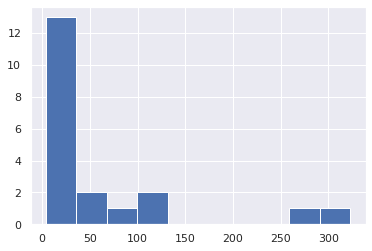

In [19]:
import matplotlib.pyplot as plt
community_size_list = [len(c) for c in cc]
plt.hist(community_size_list)

In [20]:
selected_community_list = [c for c in cc if 500 > len(c) > 100]
len(selected_community_list)

3

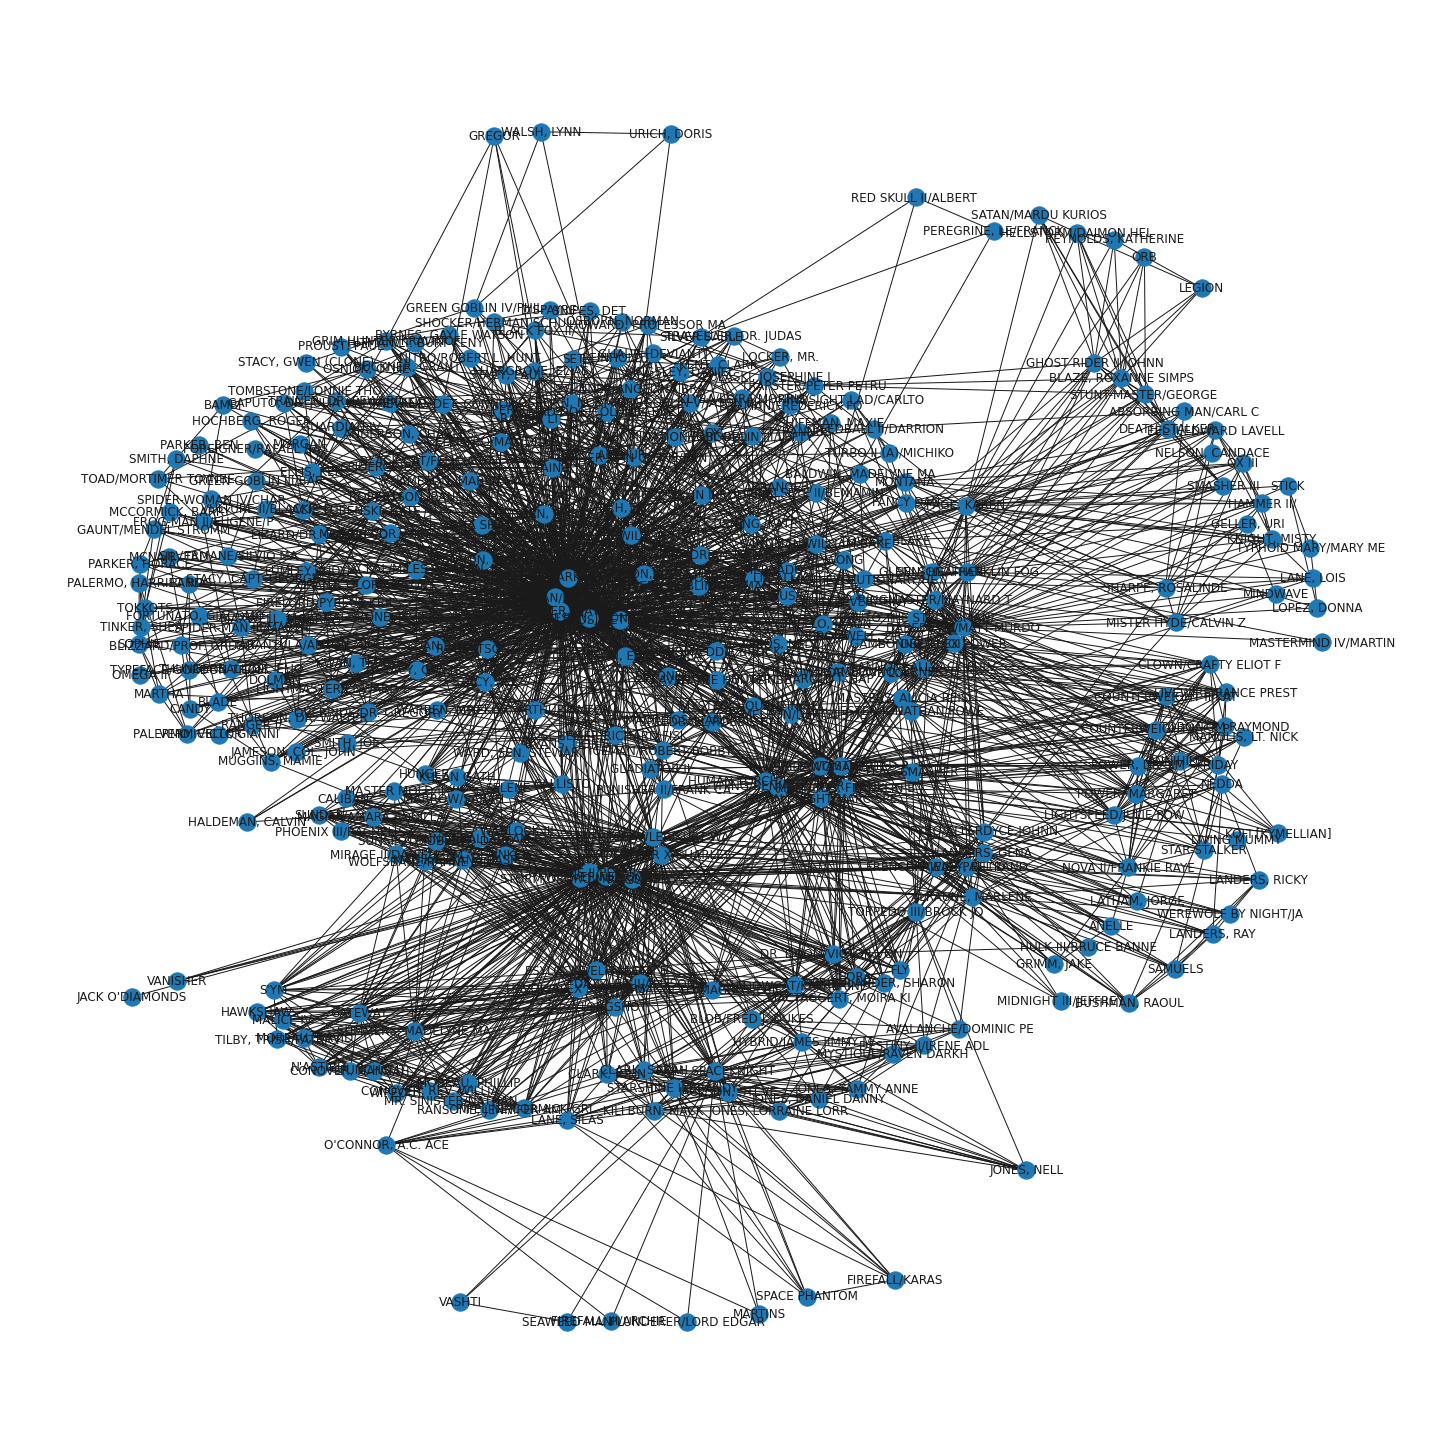

In [21]:
plt.figure(figsize=(20,20))
c1 = h.subgraph(selected_community_list[0])
nx.draw_kamada_kawai(c1, with_labels=True)

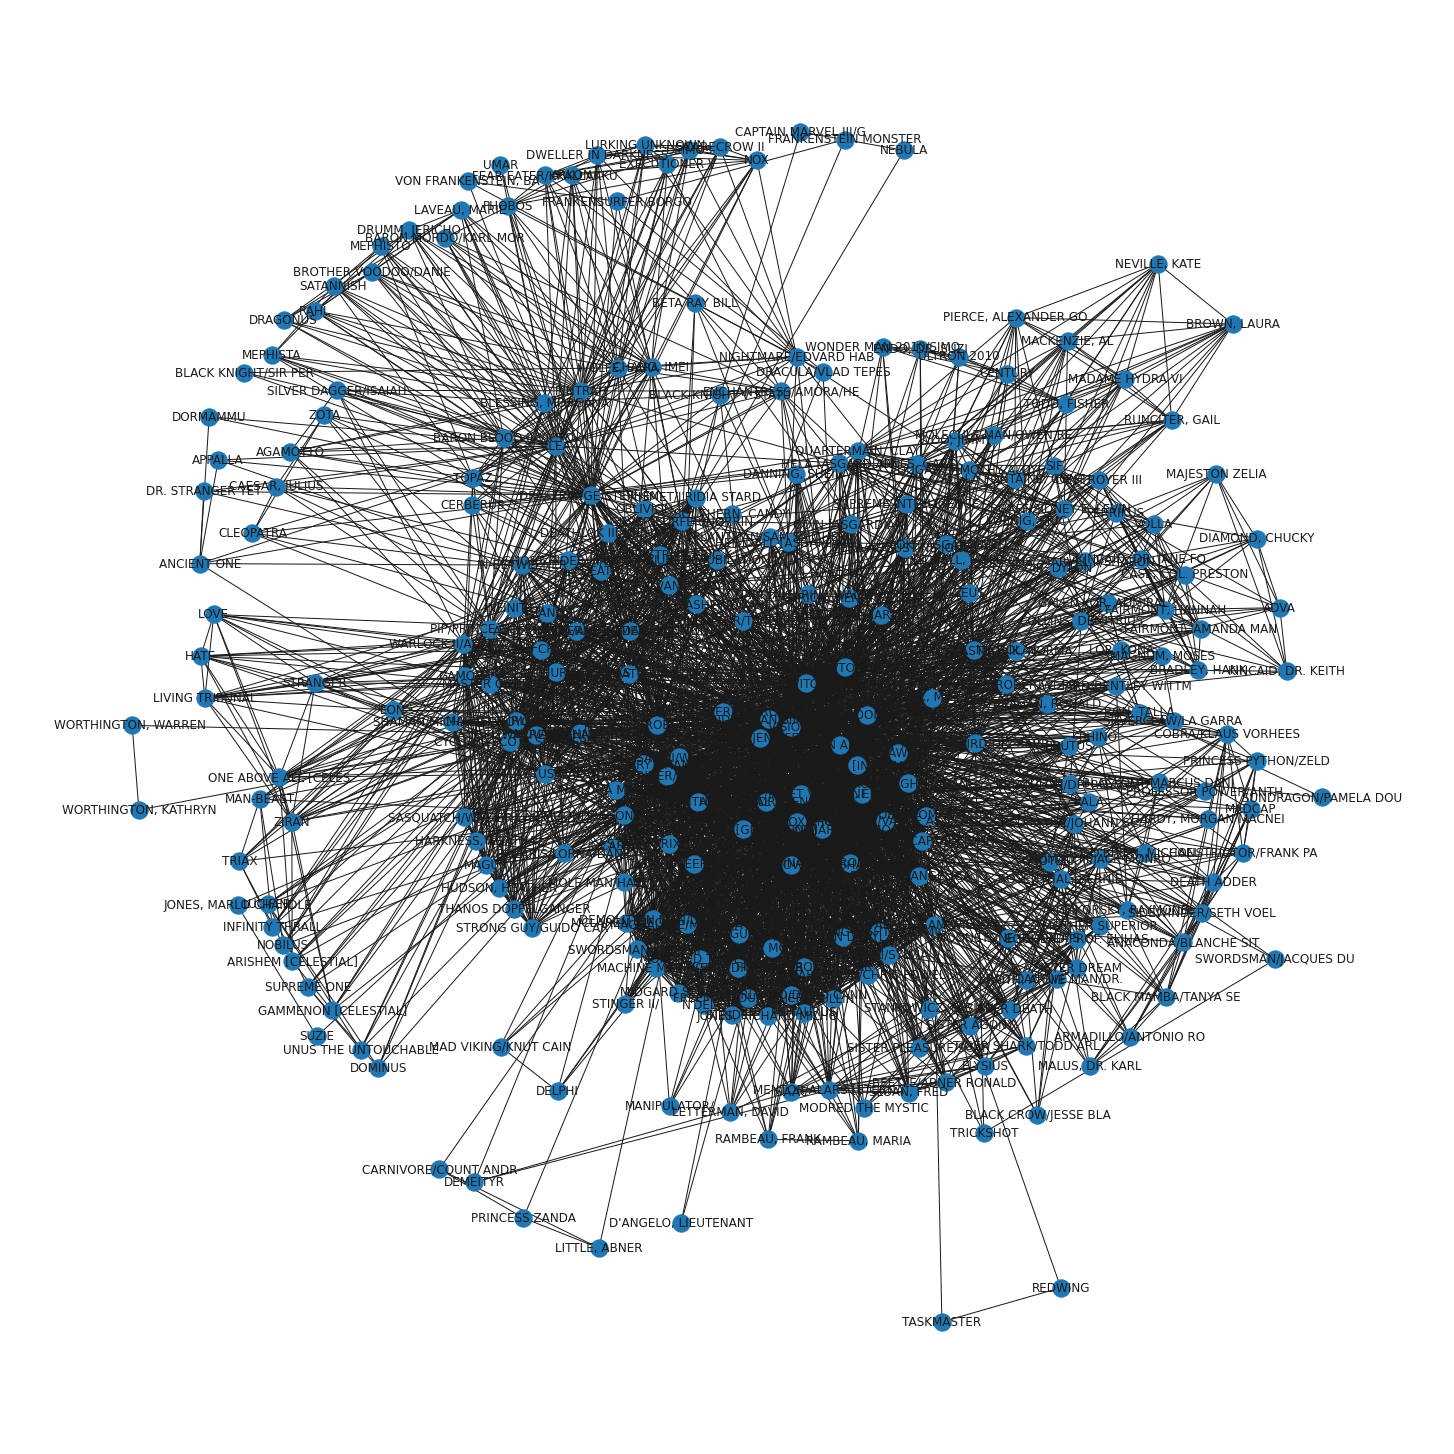

In [22]:


plt.figure(figsize=(20,20))
c2 = h.subgraph(selected_community_list[1])
nx.draw_kamada_kawai(c2, with_labels=True)

In [23]:
#According to PageRank who is the most centeral hero:
d = nx.pagerank(g)
max(dict(d).items(), key=operator.itemgetter(1))   


('CAPTAIN AMERICA', 0.002814385058241646)

In [24]:
#According to Closeness Centrality who is the most central hero:
d = nx.closeness_centrality(g) # can take some time to run

max(dict(d).items(), key=operator.itemgetter(1))

('CAPTAIN AMERICA', 0.03301308154817838)

In [25]:
def find_centeral_node(graph):
    print("-"*100)
    print(nx.info(graph))
    d = nx.degree_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central role according to Degree Centrality is %s" % hero)

    d = nx.pagerank(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most central  role according to PageRank is %s" % hero)

    d = nx.closeness_centrality(graph)
    hero = max(dict(d).items(), key=operator.itemgetter(1))[0]
    print("The most centcentral role according to Closeness Centrality is %s" % hero)



In [26]:
for c in cc:
    if len(c) < 10: # skip small communities with only few nodes
        continue
    h = g.subgraph(c)
    find_centeral_node(h)

----------------------------------------------------------------------------------------------------
Graph with 323 nodes and 3141 edges
The most central role according to Degree Centrality is SPIDER-MAN/PETER PAR
The most central  role according to PageRank is SPIDER-MAN/PETER PAR
The most centcentral role according to Closeness Centrality is SPIDER-MAN/PETER PAR
----------------------------------------------------------------------------------------------------
Graph with 281 nodes and 4235 edges
The most central role according to Degree Centrality is CAPTAIN AMERICA
The most central  role according to PageRank is CAPTAIN AMERICA
The most centcentral role according to Closeness Centrality is CAPTAIN AMERICA
----------------------------------------------------------------------------------------------------
Graph with 101 nodes and 400 edges
The most central role according to Degree Centrality is BANNER, BETTY ROSS T
The most central  role according to PageRank is BANNER, BETTY ROSS T

In [27]:
nx.shortest_path(g, "BLACK PANTHER/T'CHAL", "VULTURE II/BLACKIE D")

["BLACK PANTHER/T'CHAL", 'SPIDER-MAN/PETER PAR', 'VULTURE II/BLACKIE D']

In [28]:
#%%timeit
# Will run for a very very long time
#max_clique_graph = nx.make_max_clique_graph(g)

In [31]:
import igraph

def create_igraph_object(vertices_list, edges_list, is_directed):
    ig = igraph.Graph(directed=is_directed)
    ig.add_vertices(len(vertices_list))
    ig.vs["name"] = vertices_list
    v_dict = {vertices_list[i]:i  for i in range(len(vertices_list))}
    # Need to be careful! If edges_list contains both (a,b) and (b,a) they will
    # inserted as different edges
    edges_list = [(v_dict[e[0]], v_dict[e[1]]) for e in edges_list]
    ig.add_edges(edges_list)
    return ig

ig = create_igraph_object(list(g.nodes()), list(g.edges()), False)
print(f"Verticies {ig.vcount()} and Links {ig.ecount()}")

Verticies 19143 and Links 13738


In [32]:
%%timeit
largest_c = ig.largest_cliques()

149 ms ± 30.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
largest_c = ig.largest_cliques()
print("Largest clique with %s vertcies" % len(largest_c[0]))
h = ig.subgraph(largest_c[0])
h.vs["name"]

Largest clique with 56 vertcies


['ANT-MAN/DR. HENRY J.',
 'BEAST/HENRY &HANK& P',
 'BINARY/CAROL DANVERS',
 "BLACK PANTHER/T'CHAL",
 'CAPTAIN AMERICA',
 'CAPTAIN MARVEL II/MO',
 'CRYSTAL [INHUMAN]',
 'DARKHAWK/CHRIS POWEL',
 'DEMOLITION MAN/DENNI',
 'FALCON/SAM WILSON',
 'FIREBIRD/BONITA JUAR',
 'FIRESTAR/ANGELICA JO',
 'GULLIN',
 'HAWK',
 'HERCULES [GREEK GOD]',
 'HULK/DR. ROBERT BRUC',
 'JONES, RICHARD MILHO',
 'JUSTICE II/VANCE AST',
 'LE FEY, MORGAN',
 'LIVING LIGHTNING/MIG',
 'LUNA/LUNA MAXIMOFF [',
 'MACHINE MAN/X-51',
 'MAGDALENE/MARISSA DA',
 'MCLAREN, MEGAN',
 'MIDGARD SERPENT',
 'MOONDRAGON/HEATHER D',
 'MOON KNIGHT/MARC SPE',
 'MORDRED THE EVIL',
 'MR. FANTASTIC/REED R',
 'MUTAURUS',
 "N'DELE",
 'QUASAR III/WENDELL V',
 'QUICKSILVER/PIETRO M',
 'RAGE/ELVIN DARYL HAL',
 'SANDMAN/WILLIAM BAKE',
 'SERSI/SYLVIA',
 'SHE-HULK/JENNIFER WA',
 'SPIDER-WOMAN II/JULI',
 'STARFOX/EROS',
 'STRIDER',
 'SUB-MARINER/NAMOR MA',
 'SWORDSMAN III/PHILIP',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'TIGRA/GREER NELSON'

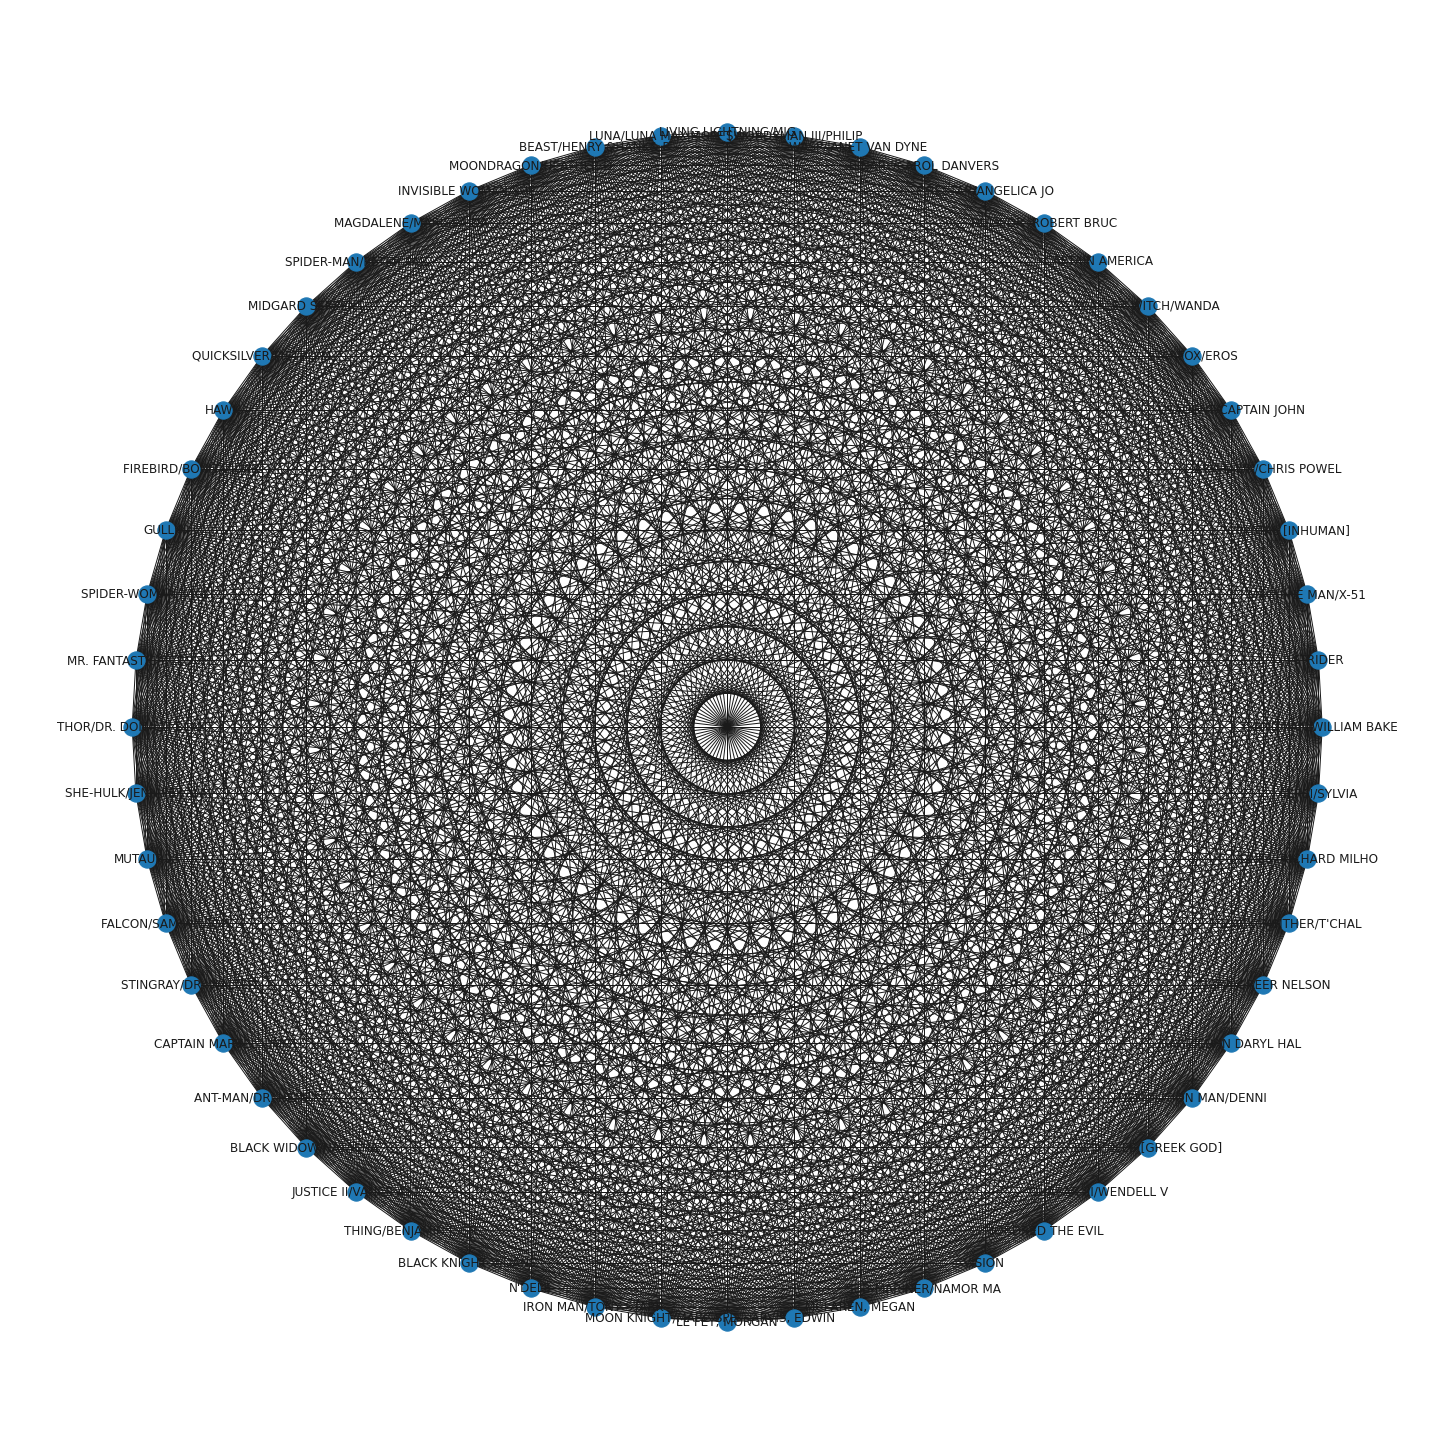

In [34]:
plt.figure(figsize=(20,20))
h = g.subgraph(h.vs["name"])
nx.draw_circular(h, with_labels=True)